In [1]:
from src.db import MySQLCommand

sql = MySQLCommand(
    host='localhost',
    port=3306,
    user='root',
    passwd='12345678',
    database='heart_disease',
    charset='utf8'
)
sql.connectMysql()

In [35]:
# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.preprocessing import KBinsDiscretizer
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score
import wquantiles


# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

In [153]:
# 查看数据
sql_op = '''SELECT count(*) FROM heart_disease_uci'''
total= sql.queryMysql_str(sql_op)[0][0]


((28, 1), (29, 3), (30, 1), (31, 2), (32, 5), (33, 2), (34, 7), (35, 11), (36, 6), (37, 11), (38, 16), (39, 15), (40, 13), (41, 24), (42, 18), (43, 24), (44, 19), (45, 18), (46, 24), (47, 19), (48, 31), (49, 22), (50, 25), (51, 35), (52, 36), (53, 33), (54, 51), (55, 41), (56, 38), (57, 38), (58, 43), (59, 35), (60, 32), (61, 31), (62, 35), (63, 30), (64, 22), (65, 21), (66, 13), (67, 15), (68, 10), (69, 13), (70, 7), (71, 5), (72, 4), (73, 1), (74, 7), (75, 3), (76, 2), (77, 2))
Mean: 53.51086956521739
Median: 54.29347826086956
Mode: Age    54
Cnt    51
Name: 26, dtype: int64


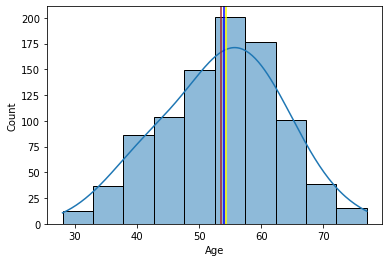

In [154]:
# 年龄分布
sql_op='''
SELECT age, COUNT(*) AS count
FROM heart_disease_uci
GROUP BY age
ORDER BY age ASC;
'''
res = sql.queryMysql_str(sql_op)
print(res)
df = pd.DataFrame(res, columns=['Age', 'Cnt'])
sns.histplot(data=df, x='Age', weights='Cnt',kde=True)
plt.axvline(np.average(df['Age'], weights=df['Cnt']), color='brown')
plt.axvline(wquantiles.median(df['Age'],weights=df['Cnt']), color='yellow')
plt.axvline(df.loc[df['Cnt'].idxmax(), 'Age'], color='blue')

print('Mean:', np.average(df['Age'], weights=df['Cnt']))
print('Median:', wquantiles.median(df['Age'],weights=df['Cnt']))
print('Mode:', df.loc[df['Cnt'].idxmax()])


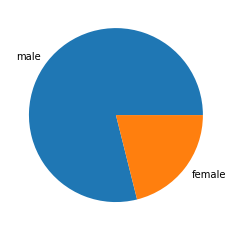

In [155]:
# 性别分布
sql_op = '''SELECT count(*) FROM heart_disease_uci WHERE sex='Male' '''
male = sql.queryMysql_str(sql_op)[0][0]
female = total-male

plt.pie([male,female],labels=['male','female'])
plt.show()

In [156]:
# 胸痛类型分布
sql_op='''
SELECT cp, num, COUNT(*) AS count
FROM heart_disease_uci
GROUP BY cp, num
ORDER BY count DESC;
'''
rr = sql.queryMysql_str(sql_op)


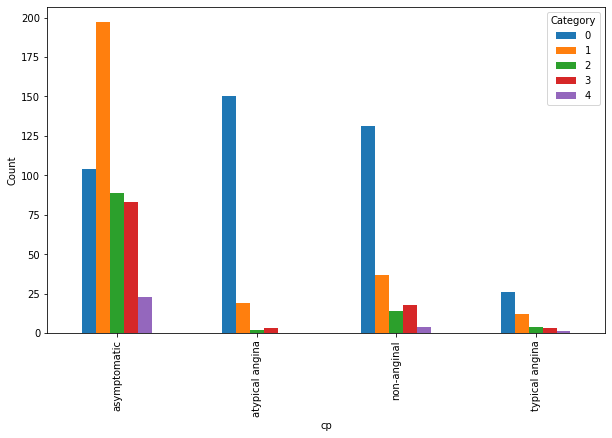

In [157]:
#  num:the predicted attribute
df = pd.DataFrame(rr)
# 每种症状可能对应的病程可视化

grouped = df.groupby([0,1])[2].sum().unstack()

# 绘制条形图
grouped.plot(kind='bar', figsize=(10, 6))

# 设置标签和标题
plt.xlabel('cp')
plt.ylabel('Count')
# plt.title('Bar Chart of Values by Subcategory and Category')

# 显示图例
plt.legend(title='Category')

# 显示图形
plt.show()

In [158]:
# 静息血压值-箱线
sql_op='''
SELECT trestbps, num
FROM heart_disease_uci
'''
rr_trestbps = sql.queryMysql_str(sql_op)

In [160]:
df = pd.DataFrame(rr_trestbps)
fig = go.Figure()
fig.add_trace(go.Box(y=df[0].values , name='BP at Rest for all', marker_color = 'brown',boxmean=True))
fig.add_trace(go.Box(y=df[df[1]== 0][0].values, name ='No Disease', marker_color = 'blue', boxmean = True))
fig.add_trace(go.Box(y=df[df[1] !=0][0].values, name ='Heart Disease', marker_color = 'yellow', boxmean = True))
fig.update_layout(title = 'BP Distribution (at rest)', yaxis_title = 'Blood Pressure (mm/Hg)', title_x = 0.5)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

In [161]:
# chol：一种对身体功能至关重要的脂肪物质，但水平升高会导致心脏病。
# 胸痛类型分布
sql_op='''
SELECT chol, num
FROM heart_disease_uci
'''
chol_rr = sql.queryMysql_str(sql_op)

In [162]:
df = pd.DataFrame(chol_rr)
fig = go.Figure()
fig.add_trace(go.Box(y=df[0].values , name='BP at Rest for all', marker_color = 'brown',boxmean=True))
fig.add_trace(go.Box(y=df[df[1]== 0][0].values, name ='No Disease', marker_color = 'blue', boxmean = True))
fig.add_trace(go.Box(y=df[df[1] !=0][0].values, name ='Heart Disease', marker_color = 'yellow', boxmean = True))
fig.update_layout(title = 'BP Distribution (at rest)', yaxis_title = 'chol', title_x = 0.5)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

In [163]:
# # Thal ( Thalesmia)
# Thalium stress test result: O: Normal, 1: Fixed defect, 2: Reversible defect, 3: Not described

sql_op='''
SELECT Thal,sex, COUNT(*) AS count
FROM heart_disease_uci
GROUP BY Thal, sex
ORDER BY count DESC;
'''
Thal_rr = sql.queryMysql_str(sql_op)

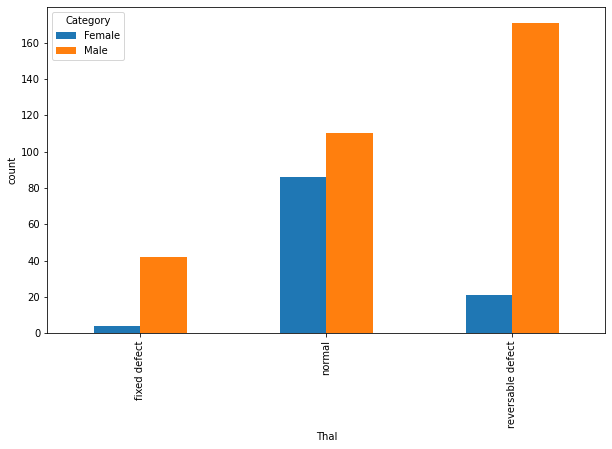

In [164]:
# 按照性别分组的可视化
df= pd.DataFrame(Thal_rr)
grouped = df[df[0]!=''].groupby([0,1])[2].sum().unstack()
# 绘制条形图
grouped.plot(kind='bar', figsize=(10, 6))

# 设置标签和标题
plt.xlabel('Thal')
plt.ylabel('count')
# plt.title('Bar Chart of Values by Subcategory and Category')

# 显示图例
plt.legend(title='Category')

# 显示图形
plt.show()

In [165]:
# 按照病程num进行分组
# # Thal ( Thalesmia)
# Thalium stress test result: O: Normal, 1: Fixed defect, 2: Reversible defect, 3: Not described
sql_op='''
SELECT Thal,num, COUNT(*) AS count
FROM heart_disease_uci
GROUP BY Thal, num
ORDER BY count DESC;
'''
Thal_rr_2 = sql.queryMysql_str(sql_op)

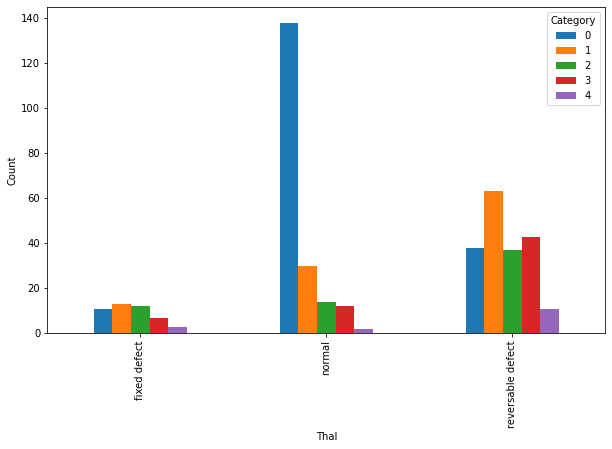

In [166]:
#  num:the predicted attribute
df = pd.DataFrame(Thal_rr_2)
# 每种症状可能对应的病程可视化

grouped = df[df[0]!=''].groupby([0,1])[2].sum().unstack()

# 绘制条形图
grouped.plot(kind='bar', figsize=(10, 6))

# 设置标签和标题
plt.xlabel('Thal')
plt.ylabel('Count')
# plt.title('Bar Chart of Values by Subcategory and Category')

# 显示图例
plt.legend(title='Category')

# 显示图形
plt.show()

In [167]:
# 最后对预测目标num进行可视化
sql_op='''
SELECT num, sex, age
FROM heart_disease_uci
'''
num_rr = sql.queryMysql_str(sql_op)

<AxesSubplot:xlabel='num', ylabel='count'>

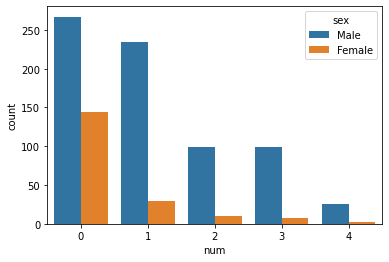

In [168]:
# 性别分组
df = pd.DataFrame(num_rr)
df.columns = ['num','sex','age']
# df
df.groupby('num')['sex'].value_counts()
sns.countplot(data = df, x = df['num'], hue = df['sex'])


<AxesSubplot:xlabel='age', ylabel='Count'>

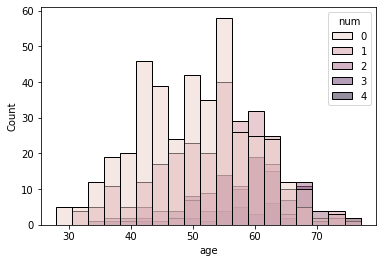

In [142]:
# 年龄
sns.histplot(data = df, x='age', hue='num')

In [ ]:
sql.closeMysql()